**Zadanie 1**

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = np.loadtxt("Advertising.csv", skiprows=1, delimiter=',', usecols=(1,2,3,4))
y = data[:,1:-1]
x = data[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

for shape in [(50,50,50,50,50),(100,100,100,100,100)]:
  for activation in ['relu', 'tanh']:
    network = MLPRegressor(solver='adam',hidden_layer_sizes=shape,
                          max_iter = 5000, tol = 0.001, activation = activation)
    network.fit(X_train, y_train)
    print('shape: ', shape, ', activation:', activation, ': ', network.score(X_test, y_test))



shape:  (50, 50, 50, 50, 50) , activation: relu :  0.9995616322878138
shape:  (50, 50, 50, 50, 50) , activation: tanh :  0.9376412640110703
shape:  (100, 100, 100, 100, 100) , activation: relu :  0.9997205330465684
shape:  (100, 100, 100, 100, 100) , activation: tanh :  0.9831695294402396


**Zadanie 2**

0.8808283494127702
[array([[ 0.60476125, -0.74663413, -0.50868292]]), array([[-1.48116558],
       [-2.54511356],
       [ 1.88937399]])] [array([-1.39226992, -0.04037809, -0.99021104]), array([0.01973991])]


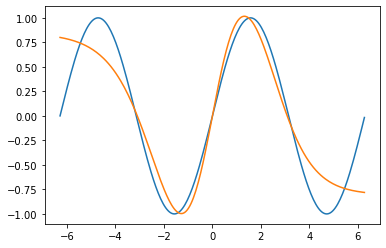

In [ ]:
import math
import matplotlib.pyplot as plt
x = np.arange(-2*math.pi, 2*math.pi, 0.05)
y = np.sin(x)
# print(x, y)
network = MLPRegressor(solver='adam',hidden_layer_sizes=(3),max_iter = 500000, tol = 0.00001, activation = 'tanh')
network.fit(x.reshape(-1,1), y)
plt.plot(x,y)
y_pred = network.predict(x.reshape(-1,1))
print(network.score(x.reshape(-1,1),y))
plt.plot(x, y_pred)
print(network.coefs_, network.intercepts_)

# wzor: tanh(0.6x+1.88) + tanh(-0.746x-2.545) + tanh(-0.5x + 1.88)

**Zadanie 3**

In [ ]:
from sklearn import datasets

data = datasets.fetch_california_housing()
x = data['data']
y = data['target']

x/=x.max(axis=0)

for shape in [(100,100,100), (50,50,50,50,50), (100,100), (50,50), (20,20,20)]:
  for activation in ['tanh', 'relu']:
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
    network = MLPRegressor(solver='adam',hidden_layer_sizes=shape,max_iter = 5000, tol = 0.001, activation = activation)
    network.fit(x, y)
    y_pred = network.predict(X_train)
    print('shape: ', shape, ', activation:', activation, ': ', network.score(X_test, y_test))




shape:  (100, 100, 100) , activation: tanh :  0.66468481393068
shape:  (100, 100, 100) , activation: relu :  0.7053995782143757
shape:  (50, 50, 50, 50, 50) , activation: tanh :  0.6687491314021327
shape:  (50, 50, 50, 50, 50) , activation: relu :  0.6635582118905394
shape:  (100, 100) , activation: tanh :  0.6569071335761401
shape:  (100, 100) , activation: relu :  0.7443763004654955
shape:  (50, 50) , activation: tanh :  0.6783045901080504
shape:  (50, 50) , activation: relu :  0.694486073905684
shape:  (20, 20, 20) , activation: tanh :  0.6977189583529411
shape:  (20, 20, 20) , activation: relu :  0.7341435366496107


**Zadanie 4**

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

data = datasets.fetch_california_housing()
x = data['data']
y = data['target']

x_plot = [i for i in range(10,4000, 100)]
y_plot = []
for epochs in x_plot:
  X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
  network = MLPRegressor(solver='adam',hidden_layer_sizes=(100),max_iter = epochs, tol = 0.001, activation = 'relu')
  network.fit(x, y)
  y_pred = network.predict(X_test)
  y_plot.append(network.score(X_test, y_test))
  # print('shape: ', shape, ', activation:', activation, ': ', network.score(X_test, y_test))

plt.plot(x_plot,y_plot)
plt.savefig('1.png')
plt.close()
plt.plot(x_plot,y_plot)
plt.ylim([0,1])
plt.savefig('2.png')
plt.close()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

data = datasets.fetch_california_housing()
x = data['data']
y = data['target']
props = [0.2, 0.35, 0.5, 0.65, 0.8]

for prop in props:
  X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=prop)
  network = MLPRegressor(solver='adam',hidden_layer_sizes=(100,100,100),max_iter = 5000, tol = 0.001, activation = 'relu')
  network.fit(x, y)
  y_pred = network.predict(X_train)
  print('props: ', prop,': ', network.score(X_test, y_test))

props:  0.2 :  0.39169378426831003
props:  0.35 :  0.5154606407818576
props:  0.5 :  0.5372629331876073
props:  0.65 :  0.49881296444229195
props:  0.8 :  0.13768516218390758
